In [5]:
from main import *
import matplotlib.pyplot as plt
np.random.seed(42)

In [9]:
res = .1
presyn = IzhikevichLayer(size = 2, resolution = res, tau=30)
postsyn = IzhikevichLayer(size = 2, resolution = res, tau=30)
syn = Synapse(presyn, postsyn)

In [10]:
v0 = []
v1 = []
i0 = []
i1 = []
w0 = []
presyn.apply_current([6,6])
postsyn.apply_current([0,0])
for i in range(int(70 / res)):
    
    syn.forward()
    postsyn.apply_current([5,5])
    postsyn.forward()
    syn.STDP(.01, 5)
    v0.append(presyn.v[1])
    v1.append(postsyn.v[1])
    i0.append(presyn.impulses[1])
    i1.append(postsyn.impulses[1])
    w0.append(syn.weights[1,1])
x = np.arange(len(v0)) * res


[[1. 1.]
 [1. 1.]] [[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]] [[0.94481955 0.94481955]
 [0.94481955 0.94481955]]
[[1.6162265 1.6162265]
 [1.6162265 1.6162265]] [[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]] [[0.67388351 0.67388351]
 [0.67388351 0.67388351]]
[[1.43080024 1.43080024]
 [1.43080024 1.43080024]] [[0. 0.]
 [0. 0.]]


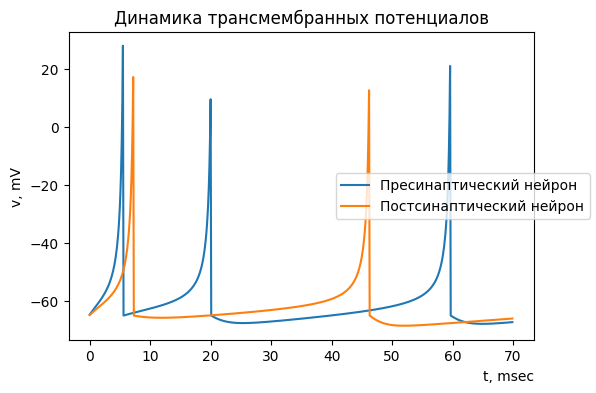

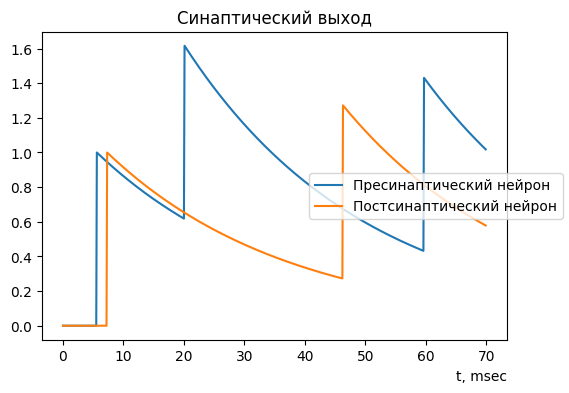

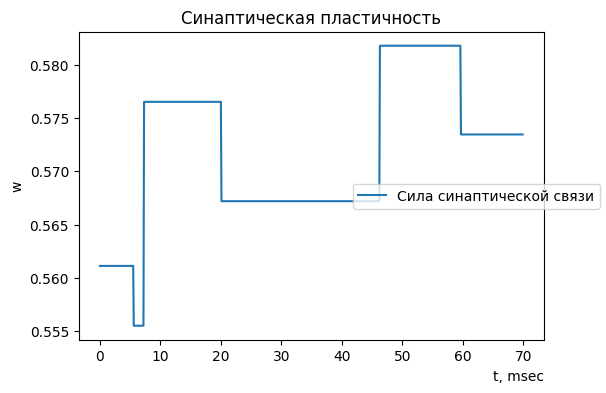

In [12]:
fsize = (6, 4)
dpi = 100
vs = plt.figure(figsize=fsize, dpi=dpi)
plt.title('Динамика трансмембранных потенциалов')
plt.plot(x,v0)
plt.plot(x,v1)
plt.xlabel('t, msec', loc='right')
plt.ylabel('v, mV')
vs.legend(['Пресинаптический нейрон', 'Постсинаптический нейрон'], loc='right')
vs.savefig('Izhikevich.png')
#vs.show()
ims = plt.figure(figsize=fsize, dpi=dpi)
plt.title('Синаптический выход')
plt.plot(x,i0)
plt.plot(x, i1)
plt.xlabel('t, msec', loc='right')
#plt.ylabel()
ims.legend(['Пресинаптический нейрон', 'Постсинаптический нейрон'], loc='right')
ims.savefig('synaptic_output.png')
#ims.show()
ws = plt.figure(figsize=fsize, dpi=dpi)
plt.title('Синаптическая пластичность')
plt.plot(x,w0)
plt.xlabel('t, msec', loc='right')
plt.ylabel('w')
ws.legend(['Сила синаптической связи'], loc='right')
ws.savefig('weights.png')
#ws.show()